In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [69]:
def generate_examples(num=1000):
    W = [1.0, -3.0]
    
    b = 1.0
    
    W = np.reshape(W, (2,1))
    
    X = np.random.randn(num, 2)
    
    y = b + np.dot(X, W) + np.random.randn()
    
    y = np.reshape(y, (num, 1))
    
    return X, y

In [70]:
X, y = generate_examples()
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [71]:
print(X[0], y[0])

[0.29331726 0.59925972] [-0.44775963]


In [72]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [73]:
model = Model(2)
print(model.W)
print(model.b)

[[ 0.22631322]
 [-1.47974912]]
-0.025488277156943184


In [74]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [75]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


In [76]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [77]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [78]:
loss

5.327554003140038

In [79]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db

In [80]:
model = Model(2)

X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [81]:
print(dW, db)

[-0.29942263  3.85405666] 1.3417753458000652


In [82]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

In [83]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range (0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = model.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i % 100 == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [84]:
model = Model(2)


In [85]:
x_train, y_train = generate_examples()

In [86]:
losses= model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Current loss: 12.2422
Iter: 100, Current loss: 6.5147
Iter: 200, Current loss: 3.4741
Iter: 300, Current loss: 1.8564
Iter: 400, Current loss: 0.9940
Iter: 500, Current loss: 0.5332
Iter: 600, Current loss: 0.2866
Iter: 700, Current loss: 0.1543
Iter: 800, Current loss: 0.0832
Iter: 900, Current loss: 0.0450


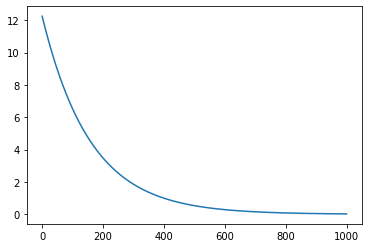

In [87]:
plt.plot(losses)

In [88]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [89]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

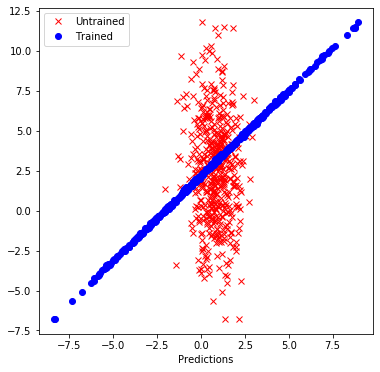

In [90]:
plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx', label="Untrained")
plt.plot(preds_trained, y_test, 'bo', label='Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel;('Ground Truth')
plt.show()